# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [26]:
import requests

busqueda = 'camiseta boca juniors'
url = 'https://api.mercadolibre.com/sites/{}/search?q={}'.format('MLA', busqueda.replace(' ', '%20'))

#Pedimos los datos al servidor.
response = requests.request('GET', url)
print(response)

data = response.json()

data

<Response [200]>


{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'camiseta boca juniors',
 'paging': {'total': 1383, 'primary_results': 100, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1388433681',
   'title': 'Camiseta Boca Juniors Premium Adultos 23/24',
   'condition': 'new',
   'thumbnail_id': '976755-MLA71981098277_092023',
   'catalog_product_id': None,
   'listing_type_id': 'gold_special',
   'permalink': 'https://articulo.mercadolibre.com.ar/MLA-1388433681-camiseta-boca-juniors-premium-adultos-2324-_JM',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA1286',
   'domain_id': 'MLA-FOOTBALL_SHIRTS',
   'variation_id': '180040460517',
   'thumbnail': 'http://http2.mlstatic.com/D_976755-MLA71981098277_092023-O.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 14000,
   'original_price': None,
   'sale_price': None,
   'sold_quantity': 200,
   'available_quantity': 50,
   'official_store_id': None,
   'use_thumbnail_id': False,

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [57]:
import pandas as pd

precios = []
suma = 0
min = 999999
max = 0

#Creamos una lista con los precios, y calculamos el precio máximo y mínimo.
for item in data['results']:
    precios.append({'Precios' : item['price']})
    suma += item['price']
    if item['price'] < min:
        min = item['price']
    if item['price'] > max:
        max = item['price']

#Generamos un data frame con nuestros datos.
precios_df = pd.DataFrame(precios)

print('Precio promedio: ' + str(suma/len(data['results'])))

print('Precio mínimo: ' + str(min))

print('Precio máximo: ' + str(max))

precios_df

Precio promedio: 16787.384799999996
Precio mínimo: 6900
Precio máximo: 44000


,Precios
0,14000.00
1,15499.00
2,15800.00
3,17600.00
4,20990.00
5,17999.99
6,17999.99
7,23489.00
8,17990.00
9,17990.00


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

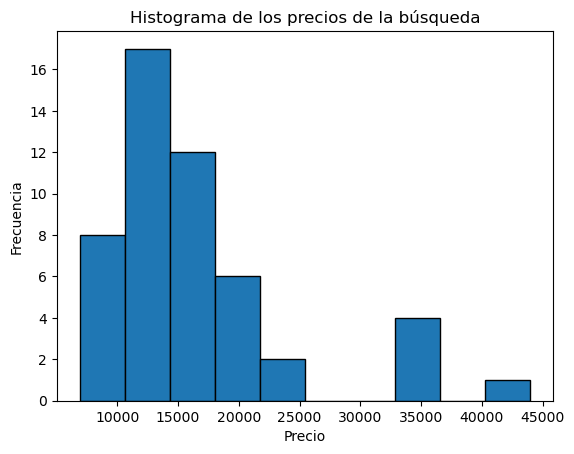

In [33]:
import matplotlib.pyplot as plt

#Generamos un histograma de diez intervalos.
plt.hist(precios_df, bins=10, edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de los precios de la búsqueda')
plt.show()

In [ ]:
#Generamos la lista precios_hist, que contiene a todos los precios de la búsqueda.
precios_hist = [item['Precios'] for item in precios]

outliers = 0

#Calculamos la cantidad de outliers.
for precio in precios_hist:
    if precio >= 30000:
        outliers += 1

outliers

Encontramos un total de 5 outliers. En este caso, definimos a los outliers como aquellos precios mayores a $30.000.